## Observations and Insights 

In [2]:
## Observations from the data

# 1) There is a strong correlation between mouse weight and tumor volume within the Capomulin treatment, which is probably the case for all treatments

# 2) The tumor volume for the most promising treament regimens (Capomulin, Ramicane, Infubinol, and Ceftamin) had lower standard deviations than the other regimens which could indicate that the mice within each regimen had similar results from the treatments

# 3) Based on the sample size and results Ramicane and Capomulin are the two most promising drug treatments




In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = mouse_metadata.merge(study_results, on="Mouse ID", how="inner")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice in the DataFrame.
combined_df["Mouse ID"].value_counts() 

g989    13
a444    10
m957    10
j296    10
b128    10
        ..
t573     1
v199     1
h428     1
f932     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated(subset=["Mouse ID", "Timepoint"])] 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Check for rows with null values 
combined_df[combined_df.isnull().any(axis = 1)] 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID 
clean_df = combined_df[combined_df["Mouse ID"] != "g989"] 
clean_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].value_counts()

a444    10
w575    10
x401    10
c282    10
a699    10
        ..
l872     1
v199     1
n482     1
u153     1
d133     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
sumsum = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem", "count"])
sumsum

,mean,median,var,std,sem,count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


## Bar Plots

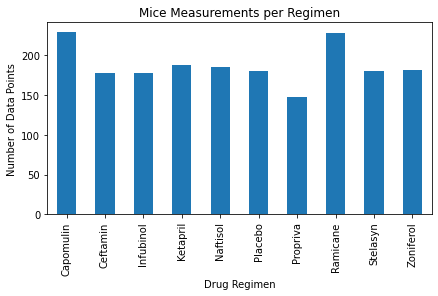

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
regimen_count = sumsum[["count"]]

regimen_count.plot(kind="bar",legend=False)
plt.tight_layout()

plt.title("Mice Measurements per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()

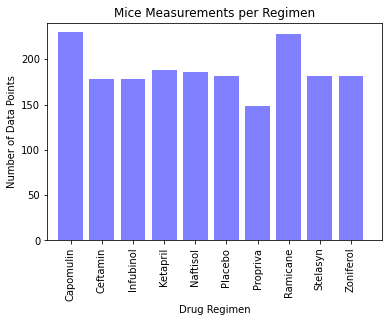

In [15]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(sumsum))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, sumsum["count"], color="b", alpha=.5, align="center")
plt.xticks(tick_locations, sumsum.index, rotation="vertical")

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(sumsum["count"])+10)

plt.title("Mice Measurements per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()

## Pie Plots

In [16]:
gender = clean_df.groupby("Sex")[["Mouse ID"]].nunique()
gender

,Mouse ID
Sex,
Female,123
Male,125


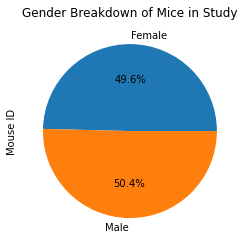

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender.plot(kind="pie", y="Mouse ID", legend=False, autopct='%1.1f%%')
plt.title("Gender Breakdown of Mice in Study")
plt.show()

/opt/anaconda3/envs/PythonData3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


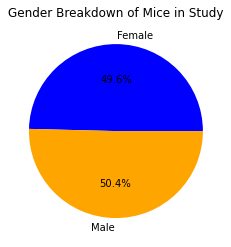

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels=["Female", "Male"], colors=["blue", "orange"], autopct="%1.1f%%")
plt.title("Gender Breakdown of Mice in Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Capomulin - final tumor volume for each mouse
capo = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
capo_mouse = capo.groupby("Mouse ID")[["Tumor Volume (mm3)"]].last()

capo_mouse 

,Tumor Volume (mm3)
Mouse ID,
b128,38.982878
b742,38.939633
f966,30.485985
g288,37.074024
g316,40.159220
i557,47.685963
i738,37.311846
j119,38.125164
j246,38.753265


In [38]:
# Capomulin quartiles and outliers 
c = capo_mouse["Tumor Volume (mm3)"]

c_quartiles = c.quantile([0.25, 0.5, 0.75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq - c_lowerq

print(f"The lower quartile of tumor volume is: {c_lowerq}")
print(f"The upper quartile of tumor volume is: {c_upperq}")
print(f"The interquartile range of tumor volume is: {c_iqr}")
print(f"The the median of tumor volume is: {c_quartiles[0.5]} ")

c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)
print(f"Values below {c_lower_bound} could be outliers.")
print(f"Values above {c_upper_bound} could be outliers.")

The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [23]:
# Ramicane - final tumor volume for each mouse
rami = clean_df[clean_df["Drug Regimen"] == "Ramicane"]
rami_mouse = rami.groupby("Mouse ID")[["Tumor Volume (mm3)"]].last()

rami_mouse

,Tumor Volume (mm3)
Mouse ID,
a411,38.407618
a444,43.047543
a520,38.810366
a644,32.978522
c458,38.342008
c758,33.397653
d251,37.311236
e662,40.659006
g791,29.128472


In [39]:
# Ramicane - quartiles and outliers 
r = rami_mouse["Tumor Volume (mm3)"]

r_quartiles = r.quantile([0.25, 0.5, 0.75])
r_lowerq = r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq - r_lowerq

print(f"The lower quartile of tumor volume is: {r_lowerq}")
print(f"The upper quartile of tumor volume is: {r_upperq}")
print(f"The interquartile range of tumor volume is: {r_iqr}")
print(f"The the median of tumor volume is: {r_quartiles[0.5]} ")

r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)
print(f"Values below {r_lower_bound} could be outliers.")
print(f"Values above {r_upper_bound} could be outliers.")

The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [26]:
# Infubinol - final tumor volume for each mouse
infu = clean_df[clean_df["Drug Regimen"] == "Infubinol"]
infu_mouse = infu.groupby("Mouse ID")[["Tumor Volume (mm3)"]].last()
infu_mouse


,Tumor Volume (mm3)
Mouse ID,
a203,67.973419
a251,65.525743
a577,57.031862
a685,66.083066
c139,72.226731
c326,36.321346
c895,60.969711
e476,62.435404
f345,60.918767


In [40]:
# Infubinol - quartiles and outliers 
i = infu_mouse["Tumor Volume (mm3)"]

i_quartiles = i.quantile([0.25, 0.5, 0.75])
i_lowerq = i_quartiles[0.25]
i_upperq = i_quartiles[0.75]
i_iqr = i_upperq - i_lowerq

print(f"The lower quartile of tumor volume is: {i_lowerq}")
print(f"The upper quartile of tumor volume is: {i_upperq}")
print(f"The interquartile range of tumor volume is: {i_iqr}")
print(f"The the median of tumor volume is: {i_quartiles[0.5]} ")

i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)
print(f"Values below {i_lower_bound} could be outliers.")
print(f"Values above {i_upper_bound} could be outliers.")

The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [28]:
# Ceftamin - final tumor volume for each mouse
ceft = clean_df[clean_df["Drug Regimen"] == "Ceftamin"]
ceft_mouse = ceft.groupby("Mouse ID")[["Tumor Volume (mm3)"]].last()
ceft_mouse

,Tumor Volume (mm3)
Mouse ID,
a275,62.999356
b447,45.000000
b487,56.057749
b759,55.742829
f436,48.722078
h531,47.784682
j296,61.849023
k210,68.923185
l471,67.748662


In [41]:
# Ceftamin - quartiles and outliers 
ce = ceft_mouse["Tumor Volume (mm3)"]

ce_quartiles = ce.quantile([0.25, 0.5, 0.75])
ce_lowerq = ce_quartiles[0.25]
ce_upperq = ce_quartiles[0.75]
ce_iqr = ce_upperq - ce_lowerq

print(f"The lower quartile of tumor volume is: {ce_lowerq}")
print(f"The upper quartile of tumor volume is: {ce_upperq}")
print(f"The interquartile range of tumor volume is: {ce_iqr}")
print(f"The the median of tumor volume is: {ce_quartiles[0.5]} ")

ce_lower_bound = ce_lowerq - (1.5*ce_iqr)
ce_upper_bound = ce_upperq + (1.5*ce_iqr)
print(f"Values below {ce_lower_bound} could be outliers.")
print(f"Values above {ce_upper_bound} could be outliers.")

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


Text(0, 0.5, 'Final Tumor Volume (mm3)')

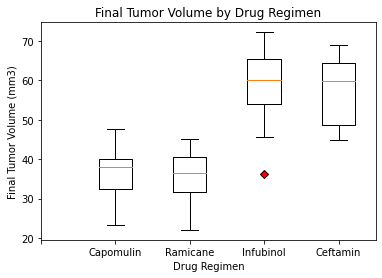

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

red_diamond = dict(markerfacecolor='r', marker='D')

fig1, ax1 = plt.subplots()
ax1.boxplot([capo_mouse["Tumor Volume (mm3)"], rami_mouse["Tumor Volume (mm3)"], infu_mouse["Tumor Volume (mm3)"], ceft_mouse["Tumor Volume (mm3)"]],flierprops=red_diamond)

plt.xticks(np.arange(5), ("","Capomulin", "Ramicane", "Infubinol", "Ceftamin"))
plt.title("Final Tumor Volume by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")


## Line and Scatter Plots

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# creating dataframe for single mouse
capo_l509 = capo[capo["Mouse ID"] == "l509"]
capo_l509

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


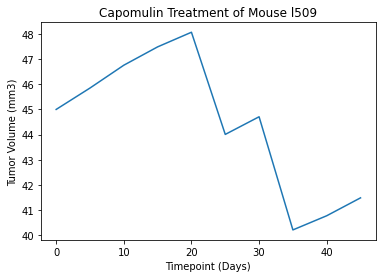

In [33]:
# Generating line plot
capo_line = plt.plot(capo_l509["Timepoint"], capo_l509["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
capo_line


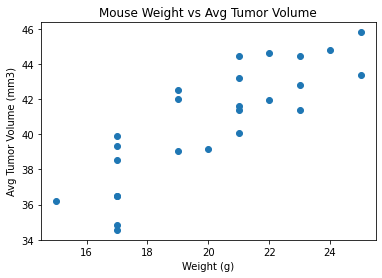

In [34]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_weight = capo.groupby("Mouse ID")["Weight (g)"].mean()
capo_tumor = capo.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

capo_scatter = plt.scatter(capo_weight, capo_tumor)
plt.title("Mouse Weight vs Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
capo_scatter

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [35]:
# correlation coefficient
corcor = st.pearsonr(capo_weight, capo_tumor)
print(f"The correlation between weight and average tumor volume is {round(corcor[0],2)}")

The correlation between weight and average tumor volume is 0.84


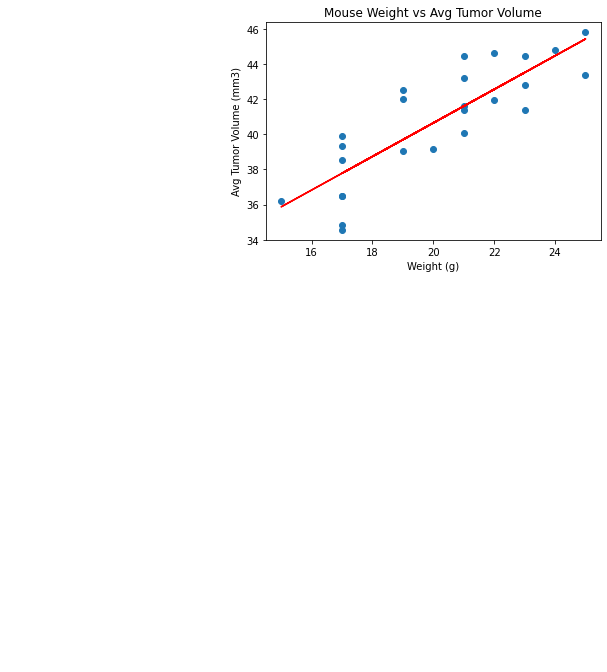

In [36]:
# linear regression model over the plot
from scipy.stats import linregress

x_values = capo_weight
y_values = capo_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
capo_regression = plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Mouse Weight vs Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
capo_regression

In [37]:
# the linear regression model
print(f"The linear regression equation is {line_eq}")

The linear regression equation is y = 0.95x + 21.55
